In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\adity\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
og_obesity = pd.read_csv("ObesityDataSet.csv")
train_dlm = pd.read_csv("train_dlm.csv")
test_data = pd.read_csv("test.csv")

In [3]:
label_encoder = preprocessing.LabelEncoder()

og_obesity_encoded = og_obesity.copy()
train_dlm_encoded = train_dlm.copy()
test_data_encoded = test_data.copy()

In [4]:
og_obesity_encoded[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']] = og_obesity_encoded[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']].apply(label_encoder.fit_transform)

train_dlm_encoded[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']] = train_dlm_encoded[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']].apply(label_encoder.fit_transform)

test_data_encoded[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']] = test_data_encoded[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']].apply(label_encoder.fit_transform)

In [5]:
og_obesity_encoded.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight


In [6]:
train_dlm_encoded.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,Overweight_Level_II
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,Normal_Weight
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,Insufficient_Weight


In [7]:
test_data_encoded.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.0,2,0,2.825629,0,0.8554,0.000000,2,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.0,2,0,3.000000,0,1.0000,0.000000,2,3
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.0,2,0,2.621877,0,0.0000,0.250502,2,3


<h2>Random Forest Classifier</h2>
<br>
<b>Using original data</b>

In [8]:
X = og_obesity_encoded.drop(columns = ['NObeyesdad'])
y = og_obesity_encoded['NObeyesdad']

In [9]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
rf_model = RandomForestClassifier(n_estimators=95, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=95, random_state=42)

In [12]:
y_pred = rf_model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8652482269503546

<Axes: >

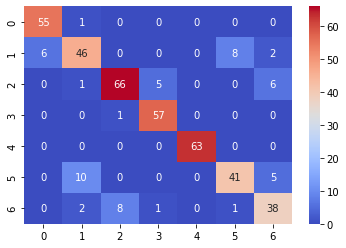

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm')

<h2>Xgboost</h2>
<br>
<b>Using original data</b>

In [15]:
#implementing XGBoost
from xgboost import XGBClassifier

In [16]:
X_xgboost = og_obesity_encoded.copy()

In [17]:
X_xgboost['NObeyesdad'] = label_encoder.fit_transform(X_xgboost['NObeyesdad'])
y_xgboost = X_xgboost['NObeyesdad']
X_xgboost.drop(columns = ['NObeyesdad'])
xg_X_train, xg_X_test, xg_y_train, xg_y_test = train_test_split(X_xgboost, y_xgboost, test_size=0.25, random_state=42)

In [18]:
xgb_model = XGBClassifier(n_estimators=10, max_depth=1, learning_rate=0.000001)
xgb_model.fit(xg_X_train, xg_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1e-06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [19]:
xgboost_y_pred = xgb_model.predict(xg_X_test)
xg_accuracy = accuracy_score(xg_y_test, xgboost_y_pred)
print(f"Accuracy: {xg_accuracy:.2f}")

Accuracy: 0.89


In [20]:
xg_feature_importance = xgb_model.feature_importances_
xg_feature_importance

array([0.        , 0.        , 0.        , 0.24712978, 0.        ,
       0.        , 0.31500888, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4378614 ], dtype=float32)

<Axes: >

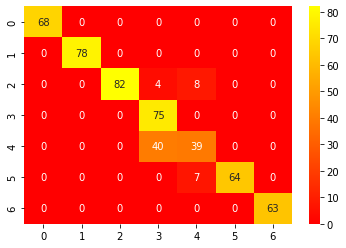

In [21]:
xg_conf_matrix = confusion_matrix(xg_y_test, xgboost_y_pred)
sns.heatmap(xg_conf_matrix, annot=True, fmt='g', cmap='autumn')

<b>Using model data</b>

<h2>Neural Network</h2>

<h2>Multilayer Perceptron</h2>

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
mlp_X_train = X_train.to_numpy()
mlp_X_test = X_test.to_numpy()
mlp_y_train = y_train.copy()
mlp_y_test = y_test.copy()

In [24]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(mlp_X_train)  
mlp_X_train = scaler.transform(mlp_X_train)  
# apply same transformation to test data
mlp_X_test = scaler.transform(mlp_X_test)

In [25]:
mlp = MLPClassifier(hidden_layer_sizes = (28,12), random_state = 42, learning_rate_init = 0.0038, alpha = 0.1, 
                    activation= 'relu', learning_rate = 'adaptive', solver = 'sgd', early_stopping = True, max_iter = 500)

In [26]:
mlp.fit(mlp_X_train, mlp_y_train)

MLPClassifier(alpha=0.1, early_stopping=True, hidden_layer_sizes=(28, 12),
              learning_rate='adaptive', learning_rate_init=0.0038, max_iter=500,
              random_state=42, solver='sgd')

In [27]:
mlp_y_predict = mlp.predict(mlp_X_test)

In [28]:
mlp_accuracy =  accuracy_score(mlp_y_test, mlp_y_predict)
print(f"MLP Accuracy: {mlp_accuracy:.2f}")

MLP Accuracy: 0.90


<Axes: >

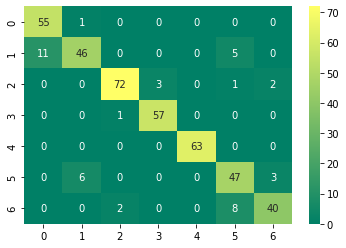

In [29]:
mlp_conf_matrix = confusion_matrix(mlp_y_test, mlp_y_predict)
sns.heatmap(mlp_conf_matrix, annot=True, fmt='g', cmap='summer')